In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import numpy as np

In [2]:
labels = pd.read_csv("labels.csv",index_col=[0]).iloc[:,0]
data = pd.read_csv("data.csv",index_col=[0])
bina = pd.read_csv("binary_no_ancestrality.csv",index_col=[0])
bina_a = pd.read_csv("binary_with_ancestrality.csv",index_col=[0])
sims = pd.read_csv("wang_pairwise_similarities.csv",index_col=[0])

sims.index = sims.index.str.replace("DOID:","obo.DOID_")
sims.columns = sims.columns.str.replace("DOID:","obo.DOID_")

dsims = 1-sims

# Pairwise (Dis)Similarities

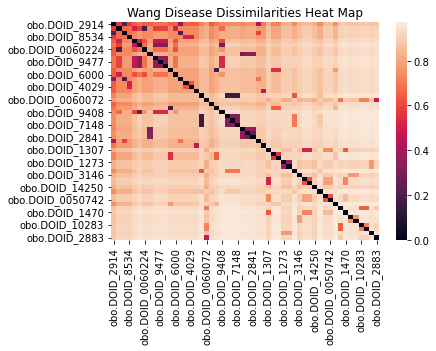

In [3]:
sort_dsim = dsims.mean().sort_values().index
sort_sim = sims.mean().sort_values().index

plt.title("Wang Disease Dissimilarities Heat Map")
sns.heatmap(dsims.loc[sort_dsim,sort_dsim])
plt.show()

# Groupwise Dis/Similarities - No ancestrality, No Semantics

In [4]:
groupwise_cosine_sim = pd.DataFrame(cosine_similarity(bina))
groupwise_cosine_dsim = 1 - groupwise_cosine_sim

<AxesSubplot:>

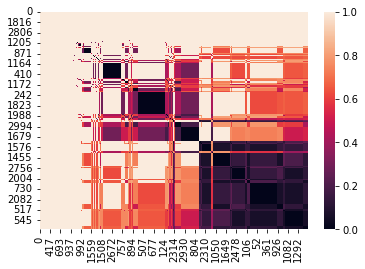

In [5]:
a = groupwise_cosine_dsim.mean().sort_values(ascending = False).index
sns.heatmap(groupwise_cosine_dsim.loc[a,a])

# Groupwise Dis/Similarities - Semantically (Mabotuwana et al.,2013)

In [6]:
bina_a_dict = {i:list(bina_a.T.iloc[:,i][bina_a.T.iloc[:,i] == 1].index) for i in bina_a.index}

In [256]:
def Mabotuwana(P1,P2):
    v1 = (sims).loc[P1,:]
    v2 = (sims).loc[P2,:]
    num = (v1.max() * v2.max()).sum()
    den = np.power(np.power(v1.max(),2).sum(),1/2) * np.power(np.power(v2.max(),2).sum(),1/2)
    if den == 0:
        return 0 ##
    else:
        return num/den

In [257]:
groupwise_wang_sims = pd.DataFrame(data=0, index = bina_a.index, columns = bina_a.index)

for i in tqdm(groupwise_wang_sims.index):
    for j in groupwise_wang_sims.index:
        if i>j:
            groupwise_wang_sims.loc[i,j] = Mabotuwana(bina_a_dict[i],bina_a_dict[j])

groupwise_wang_sims = groupwise_wang_sims.T + groupwise_wang_sims

for i in tqdm(groupwise_wang_sims.index):
    groupwise_wang_sims.loc[i,i] = Mabotuwana(bina_a_dict[i],bina_a_dict[i])

100%|█████████████████████████████████████| 3004/3004 [00:02<00:00, 1363.29it/s]


<AxesSubplot:>

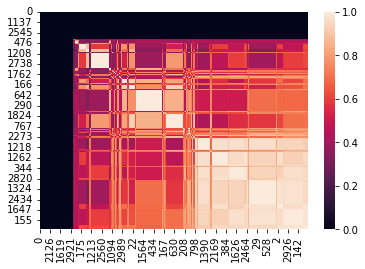

In [260]:
sort = groupwise_wang_sims.mean().sort_values().index
sns.heatmap(groupwise_wang_sims.loc[sort,sort])

In [277]:
t = groupwise_wang_sims[groupwise_wang_sims.sum() != 0].index
t = groupwise_wang_sims[groupwise_wang_sims.sum() != 0].loc[t,t]
sort = t.mean().sort_values().index
t = t.loc[sort,sort]
t

,121,2784,288,2714,2072,794,1621,1487,2812,2762,...,2291,924,388,2904,1589,223,967,30,1746,1948
121,1.000000,0.647151,0.647151,0.647151,0.647151,0.245080,0.245080,0.245080,0.245080,0.245080,...,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902
2784,0.647151,1.000000,1.000000,1.000000,1.000000,0.245080,0.245080,0.245080,0.245080,0.245080,...,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902
288,0.647151,1.000000,1.000000,1.000000,1.000000,0.245080,0.245080,0.245080,0.245080,0.245080,...,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902
2714,0.647151,1.000000,1.000000,1.000000,1.000000,0.245080,0.245080,0.245080,0.245080,0.245080,...,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902
2072,0.647151,1.000000,1.000000,1.000000,1.000000,0.245080,0.245080,0.245080,0.245080,0.245080,...,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902,0.343902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.343902,0.343902,0.343902,0.343902,0.343902,0.345694,0.345694,0.345694,0.345694,0.345694,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
967,0.343902,0.343902,0.343902,0.343902,0.343902,0.345694,0.345694,0.345694,0.345694,0.345694,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
30,0.343902,0.343902,0.343902,0.343902,0.343902,0.345694,0.345694,0.345694,0.345694,0.345694,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1746,0.343902,0.343902,0.343902,0.343902,0.343902,0.345694,0.345694,0.345694,0.345694,0.345694,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

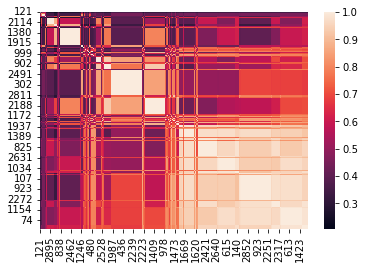

In [279]:
sns.heatmap(t)

In [290]:
sil = pd.Series(data=0,index=range(2,101))

for k in tqdm(range(2,101)):
    
    c = KMedoids(n_clusters=k,metric='precomputed',method='pam').fit(t)
    sil[k] = silhouette_score(t,c.labels_)

100%|███████████████████████████████████████████| 99/99 [07:28<00:00,  4.53s/it]


In [285]:
c = KMedoids(n_clusters=4,metric='precomputed').fit(t)

/Users/lucasgomesmaddalena/miniforge3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/Users/lucasgomesmaddalena/miniforge3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


In [291]:
pca = PCA(n_components=2, svd_solver='full').fit(t)

In [292]:
t_pca = pca.fit_transform(t)